## Упражнение 1

### 1. Слияние матриц

In [5]:
import numpy as np

In [ ]:
a = np.random.randint(1, 20, size = (4, 6))
b = np.random.randint(1, 20, size = (4, 8))
np.hstack((a,b))

### 2. Доступ по индексам



In [ ]:
a = np.random.randint(8, size = (15))
b = np.random.randint(8, size = (15))
M = np.random.randint(1, 20, size = (8,8))
print(a, '\n')
print(b, '\n')
print(M, '\n')
print(M[a,b], '\n')

### 3. След и ненулевые элементы

In [ ]:
M = np.random.randint(0, 2, size = (8,8))
print(M, '\n')
print(np.trace(M), '\n')
print(np.count_nonzero(np.diag(M)))

### 4. Вхождение элементов

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
M = np.random.randint(1, 11, size = (2, 3, 4))
unique_el, counts = np.unique(M, return_counts=True)
print(M, '\n')
print(unique_el, '\n')
print(counts)

### 5. Сравнение элементов

In [ ]:
M = np.random.randint(-11, 11, size = (3, 4))
print(M, '\n')
N = np.random.randint(-13, 13, size = (3, 4))
print(N, '\n')
M[N < 0] = 0
print(M, '\n')

### 6. Арифметика

In [ ]:
M = np.random.randint(-11, 11, size = (4, 4))
print('M = \n', M, '\n')
m = np.mean(M, 0)
res = M - m
norm = np.linalg.norm(res, ord=2, axis=0)
norm[norm == 0] = 1
res = res / norm
print(res, '\n')

In [ ]:
M = np.random.randint(-11,11, size = (4, 5))
print('M = \n', M, '\n')
N = np.random.randint(-11, 11, size = (4, 5))
print('N = \n', N, '\n')
print(N.T @ M)

### 8. Быстрое умножение

In [6]:
import time

Определим функции

In [7]:
def NumpyTime(n, it = 10):   
    timer = []
    for i in range(it):
        M = np.random.random(size=(n, n))
        N = np.random.random(size=(n, n))
        t1 = time.time()
        M @ N
        t2 = time.time()
        timer.append(t2 - t1)
    return np.mean(timer)

def SmartForTime(n, it = 10):   
    timer = []
    for k in range(it):
        M = np.random.random(size=(n, n))
        N = np.random.random(size=(n, n))
        P = np.zeros((n,n))
        t1 = time.time()
        for i in range(n):
            for j in range(n):
                P[i,j] = M[i,:]@N[:,j]
        t2 = time.time()
        timer.append(t2 - t1)
    return np.mean(timer)

def DumbForTime(n, it = 10):   
    timer = []
    for k in range(it):
        M = np.random.random(size=(n, n))
        N = np.random.random(size=(n, n))
        P = np.zeros((n,n))
        t1 = time.time()
        for i in range(n):
            for j in range(n):
                sum = 0
                for l in range(n):
                    sum += M[i,l] * N[l,j]
                P[i,j] = sum
        t2 = time.time()
        timer.append(t2 - t1)
    return np.mean(timer)

Подберём параменры выборки:

In [ ]:
print('\n np_time = ', NumpyTime(100, 1000),'\n sfor_time = ',  SmartForTime(100, 1),'\n dfor_time = ',  DumbForTime(100, 1))

Соберём данные:

In [8]:
n_arr = np.arange(10, 100)
np_data = np.vectorize(lambda x: NumpyTime(x, 10))(n_arr)
sfor_data = np.vectorize(lambda x: SmartForTime(x, 1))(n_arr)
dfor_data = np.vectorize(lambda x: DumbForTime(x, 1))(n_arr)
np_data, sfor_data, dfor_data

(array([0.00000000e+00, 0.00000000e+00, 1.00326538e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.00085068e-04,
        1.00088120e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.96112823e-05, 0.00000000e+00, 9.98497009e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00040436e-04, 0.00000000e+00, 9.95397568e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00135803e-04, 1.00016594e-04, 0.00000000e+00,
        1.00016594e-04, 1.99913979e-04, 1.00541115e-04, 9.96828079e-05,
        9.99689102e-05, 2.00152397e-04, 9.96828079e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.99961662e-04, 0.00000000e+00,
        0.00000000e+00, 1.00326538e-04, 9.98497009e-05, 2.00033188e-04,
        9.99927521e-05, 9.98020172e-05, 1.99961662e-04, 2.99882889e-04,
        2.99787521e-04, 1.99985504e-04, 1.00350380e-04, 1.000404

Построим:

In [9]:
from matplotlib import pyplot as plt

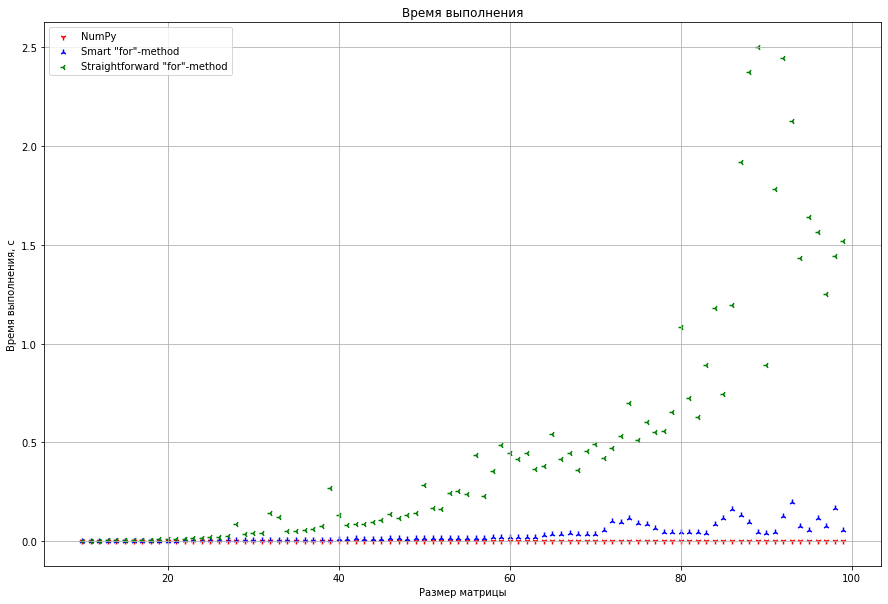

In [11]:
plt.figure(figsize=(15, 10))
plt.title('Время выполнения')
plt.scatter(n_arr, np_data, c='r', label='NumPy', marker = '1')
plt.scatter(n_arr, sfor_data, c='b', label='Smart "for"-method', marker = '2')
plt.scatter(n_arr, dfor_data, c='g', label='Straightforward "for"-method', marker = '3')
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения, c')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
n_arr_ext = np.arange(10, 400)
np_data_ext = np.vectorize(lambda x: NumpyTime(x, 10))(n_arr_ext)

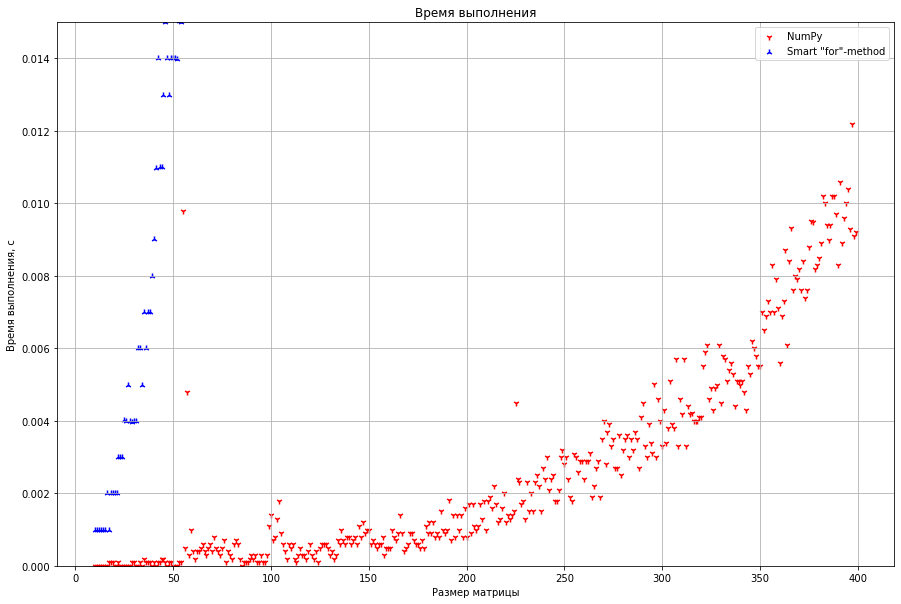

In [14]:
plt.figure(figsize=(15, 10))
plt.title('Время выполнения')
plt.scatter(n_arr_ext, np_data_ext, c='r', label='NumPy', marker = '1')
plt.scatter(n_arr, sfor_data, c='b', label='Smart "for"-method', marker = '2')
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения, c')
plt.yscale('linear')
plt.grid(True)
plt.ylim(0, 0.015)
plt.legend()
plt.show()